In [1]:
import subprocess
import os

# Source the config.sh file and capture the environment
result = subprocess.run(['bash', '-c', 'source ../config.sh && env'], 
                       capture_output=True, text=True)

# Parse the environment variables
for line in result.stdout.strip().split('\n'):
    if '=' in line:
        key, value = line.split('=', 1)
        os.environ[key] = value

In [2]:
from coamp_graph import Graph
import coamp_graph_notebook_utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
coamp_graph_notebook_utils.get_all_projects()

In [ ]:
coamp_graph_notebook_utils.get_all_alias()

In [ ]:
small_project_list = ['COLO320', 'GBM39']
small_df, __ = coamp_graph_notebook_utils.concat_projects(small_project_list)
small_graph = Graph(small_df)

In [3]:
project_list = ['655bda68bba7c92509522479', '655c060abba7c925095555da', 'ccle']
df, __ = coamp_graph_notebook_utils.concat_projects(project_list)
graph = Graph(df)
nodes = graph.Nodes()
edges = graph.Edges()

Retrieved locations for 22998 GRCh38 genes in 0.03 seconds
Loaded 28555 genes from provided reference files
Gene record creation time: 2.17 seconds
31508
Matched location data for 22976 genes
Filtering features took 0.0095 seconds, resulting in 1119 features
Preprocessing intervals and reformatting dataset took 0.0488 seconds
Starting CreateNodes with 1119 rows
Note: 26 genes are amplified on multiple feature IDs in the same sample
TEST: 18469 searches where gene's location is found
TEST: 13800 searches where gene's chr on interval and gene's location is matched to an interval
TEST: 4660 searches where gene's chr on interval but gene's location is NOT matched to an interval (2457 unique nodes)
TEST: 9 searches where gene's chr not on interval (6 unique nodes)
Processing 18587 genes took 0.1589 seconds, resulting in 7832 unique nodes
0 genes were not amplified on any merged intervals
Total CreateNodes execution: 0.1646 seconds
Starting CreateEdges with 7832 nodes
Building features index

In [ ]:
# graph = Graph(df, pdD_model='merge25kbp_cap2mbp')

In [ ]:
# P-value/Q-value Distributions by Test Type

In [4]:
p_single, p_multi_interval, p_multi_chr, p_multi_ecdna = [], [], [], []
q_single, q_multi_interval, q_multi_chr, q_multi_ecdna = [], [], [], []
na_counter = 0
for edge in edges:
    p_vals = edge.get('p_values', [-1, -1, -1, -1])
    q_vals = edge.get('q_values', [-1, -1, -1, -1])
    if p_vals == [-1, -1, -1, -1]:# and edge.get('missing_interval_data'):
        na_counter += 1
    if len(p_vals) == 4:
        p_single.append(p_vals[0])
        p_multi_interval.append(p_vals[1])
        p_multi_chr.append(p_vals[2])
        p_multi_ecdna.append(p_vals[3])
    if len(q_vals) == 4:
        q_single.append(q_vals[0])
        q_multi_interval.append(q_vals[1])
        q_multi_chr.append(q_vals[2])
        q_multi_ecdna.append(q_vals[3])
na_counter

7108

In [5]:
def every_fifth_percentile(data):
    data = np.array(data)
    percentiles = np.arange(5, 100, 5)
    return {p: np.percentile(data, p) for p in percentiles}

# Calculate the percentiles and format them
def print_percentiles_aligned(data):
    results = every_fifth_percentile(data)

    # Format and find max width for alignment
    formatted = {k: f"{v:.4f}" for k, v in results.items()}
    max_width = max(len(val) for val in formatted.values())

    for k in sorted(formatted):
        print(f"{k:>2}th percentile: {formatted[k]:>{max_width}}")

In [6]:
def plot_p_values(p_values, title="p_values"):
    filtered = [p for p in p_values if p != -1]
    print(f"{len(filtered)} valid p-values from {len(p_values)} edges\n")
    
    print_percentiles_aligned(filtered)
    
    plt.figure(figsize=(8, 6))
    plt.hist(filtered, bins=50, alpha=0.7)
    plt.title(title)
    plt.xlabel("p-values")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    


130436 valid p-values from 410023 edges

 5th percentile: 0.0000
10th percentile: 0.0002
15th percentile: 0.0018
20th percentile: 0.0081
25th percentile: 0.0217
30th percentile: 0.0399
35th percentile: 0.0514
40th percentile: 0.0647
45th percentile: 0.0791
50th percentile: 0.0969
55th percentile: 0.1166
60th percentile: 0.1387
65th percentile: 0.1644
70th percentile: 0.1913
75th percentile: 0.2203
80th percentile: 0.2495
85th percentile: 0.2802
90th percentile: 0.3171
95th percentile: 0.4448


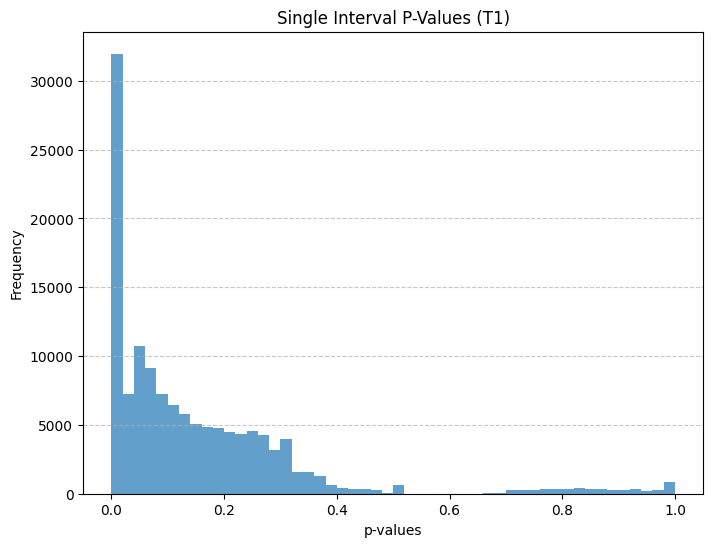

In [8]:
plot_p_values(p_single, title=f"Single Interval P-Values (T1)")

130436 valid p-values from 410023 edges

 5th percentile: 0.0000
10th percentile: 0.0019
15th percentile: 0.0119
20th percentile: 0.0404
25th percentile: 0.0867
30th percentile: 0.1328
35th percentile: 0.1470
40th percentile: 0.1618
45th percentile: 0.1757
50th percentile: 0.1938
55th percentile: 0.2120
60th percentile: 0.2312
65th percentile: 0.2529
70th percentile: 0.2732
75th percentile: 0.2937
80th percentile: 0.3119
85th percentile: 0.3296
90th percentile: 0.3518
95th percentile: 0.4683


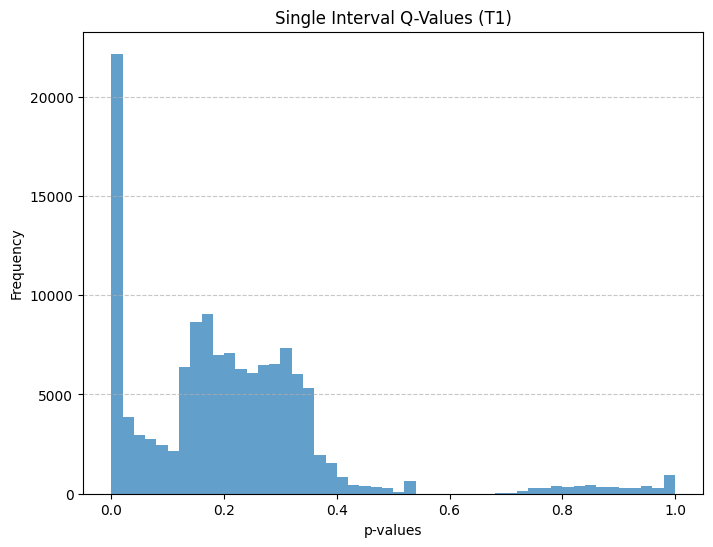

In [9]:
plot_p_values(q_single, title=f"Single Interval Q-Values (T1)")

194873 valid p-values from 410023 edges

 5th percentile: 0.0000
10th percentile: 0.0000
15th percentile: 0.0000
20th percentile: 0.0000
25th percentile: 0.0000
30th percentile: 0.0000
35th percentile: 0.0000
40th percentile: 0.0000
45th percentile: 0.0000
50th percentile: 0.0000
55th percentile: 0.0000
60th percentile: 0.0004
65th percentile: 0.0008
70th percentile: 0.0341
75th percentile: 0.0341
80th percentile: 0.0404
85th percentile: 0.0435
90th percentile: 0.0455
95th percentile: 0.0495


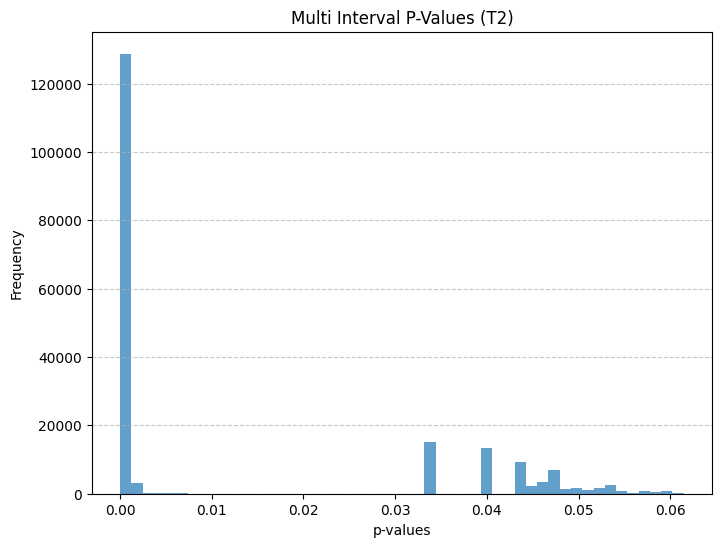

In [7]:
plot_p_values(p_multi_interval, title=f"Multi Interval P-Values (T2)")

In [ ]:
plot_p_values(q_multi_interval, title=f"Multi Interval Q-Values (T2)")

In [ ]:
plot_p_values(p_multi_chromosomal, title=f"Multi Interval P-Values (T2)")

In [ ]:
# PARAMETER SWEEP FOR MERGING THRESHOLD

In [ ]:
# test merge cutoff param
project_list_small = ['COLO320', 'GBM39']
test_df, __ = coamp_graph_notebook_utils.concat_projects(project_list_small)
test_graph = Graph(test_df, merge_cutoff=50000)
print(test_graph.MERGE_CUTOFF)

In [ ]:
tmp_graph = Graph(test_df, merge_cutoff=50000, construct_graph=False)
processed_dataset = tmp_graph.preprocessed_dataset

In [ ]:
def plot_lengths_dist(lengths, ax, merge_cutoff):
    # add a subplot
    ax.hist(lengths, bins=50, alpha=0.7, color='blue')
    ax.set_title(f'merge_cutoff = {merge_cutoff}bp')
    ax.set_xlabel(f"Interval Lengths (n={len(lengths)})")
    ax.set_ylabel("Frequency")

    # plot mean line
    if lengths:
        adj_mean = sum(lengths) / len(lengths)
        ax.axvline(adj_mean, color='black', linestyle='dashed', linewidth=2, label=f'Mean = {adj_mean:.2f}')
    ax.legend()

In [ ]:
cutoff_values = list(range(10000, 51000, 5000))
num_plots = len(cutoff_values)
cols = 4
rows = (num_plots + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 3 * rows))
axes = axes.flatten() 

for idx, merge_cutoff in enumerate(cutoff_values):
    ax = axes[idx]

    tmp_graph = Graph(df, merge_cutoff=merge_cutoff, construct_graph=False)
    processed_dataset = tmp_graph.preprocessed_dataset
    lengths = [interval[2] - interval[1] for list in processed_dataset['Merged_Intervals'] for interval in list if interval]

    plot_lengths_dist(lengths, ax, merge_cutoff)

# hide unused subplots if any
for j in range(len(cutoff_values), len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

In [ ]:
### PLOT pdD DISTRIBUTION FOR CAPPED LENGTHS MODEL ###

In [ ]:
# df, __ = coamp_graph_notebook_utils.concat_projects(project_list)

In [ ]:
baseline = Graph(df)
capped = Graph(df, pdD_model='gamma_capped_5m')
merge25kbp_cap2mbp = Graph(df, pdD_model='merge25kbp_cap2mbp')
merge25kbp_cap1mbp = Graph(df, pdD_model='merge25kbp_cap1mbp')

In [ ]:
pdD_baseline = [edge['p_d_D'] for edge in baseline.Edges() if edge['p_d_D'] != -1]
pdD_capped = [edge['p_d_D'] for edge in capped.Edges() if edge['p_d_D'] != -1]
pdD_merge25kbp_cap2mbp = [edge['p_d_D'] for edge in merge25kbp_cap2mbp.Edges() if edge['p_d_D'] != -1]
pdD_merge25kbp_cap1mbp = [edge['p_d_D'] for edge in merge25kbp_cap1mbp.Edges() if edge['p_d_D'] != -1]

In [ ]:
pdD_baseline = pd.DataFrame(pdD_baseline, columns=['Baseline pdD Values'])
pdD_baseline.describe()

In [ ]:
pdD_capped = pd.DataFrame(pdD_capped, columns=['pdD Values'])
pdD_capped.describe()

In [ ]:
pdD_merge25kbp_cap2mbp = pd.DataFrame(pdD_merge25kbp_cap2mbp, columns=['Case 1 pdD Values'])
pdD_merge25kbp_cap2mbp.describe()

In [ ]:
pdD_merge25kbp_cap1mbp = pd.DataFrame(pdD_merge25kbp_cap1mbp, columns=['Case 2 pdD Values'])
pdD_merge25kbp_cap1mbp.describe()

In [ ]:
# overlayed
plt.figure(figsize=(8, 5))
plt.hist(pdD_baseline, bins=50, range=(0, 1), alpha=0.5, label='Baseline')
plt.hist(pdD_merge25kbp_cap1mbp, bins=50, range=(0, 1), alpha=0.5, label='Capped 1Mbp, Merged 25kbp')
plt.xlabel('pdD Value')
plt.ylabel('Frequency')
plt.title('Histogram of pdD Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# histogram for baseline
axs[0].hist(pdD_baseline, bins=50, range=(0, 1), color='skyblue', edgecolor='black')
axs[0].set_title('Baseline pdD')
axs[0].set_xlabel('pdD Value')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

# histogram for capped
axs[1].hist(pdD_merge25kbp_cap2mbp, bins=50, range=(0, 1), color='salmon', edgecolor='black')
axs[1].set_title('Case 1: Merge 25kbp apart, Cap 2Mbp')
axs[1].set_xlabel('pdD Value')
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
p_single = []
q_single = []
na_counter = 0
for edge in merge25kbp_cap1mbp.Edges():
    p_vals = edge.get('p_values', [-1, -1, -1, -1])
    q_vals = edge.get('q_values', [-1, -1, -1, -1])
    if p_vals == [-1, -1, -1, -1]:# and edge.get('missing_interval_data'):
        na_counter += 1
    if len(p_vals) == 4:
        p_single.append(p_vals[0])
    if len(q_vals) == 4:
        q_single.append(q_vals[0])
na_counter

In [ ]:
plot_p_values(p_single, title=f"Single Interval P-Values, merge25kbp_cap2mbp pdD")

In [ ]:
plot_p_values(q_single, title=f"Single Interval Q-Values, merge25kbp_cap2mbp pdD")